In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


Loading the data and inspecting the first few rows.


In [ ]:
df = pd.read_csv("WineQT.csv")

In [ ]:
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


Checking for missing values

In [ ]:
df.isnull().sum()



,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [ ]:
df.isnull().sum().sum()

0

Mean of all features

In [ ]:
for column in df.columns:
    x = np.mean(df[column])
    print(column + ": ")
    print(x)

fixed acidity: 
8.311111111111112
volatile acidity: 
0.5313385826771653
citric acid: 
0.2683639545056868
residual sugar: 
2.5321522309711284
chlorides: 
0.08693263342082239
free sulfur dioxide: 
15.615485564304462
total sulfur dioxide: 
45.91469816272966
density: 
0.9967304111986001
pH: 
3.3110148731408575
sulphates: 
0.6577077865266842
alcohol: 
10.442111402741325
quality: 
5.657042869641295
Id: 
804.9693788276466


Median of all features

In [ ]:
for column in df.columns:
    x = np.median(df[column])
    print(column + ": ")
    print(x)

fixed acidity: 
7.9
volatile acidity: 
0.52
citric acid: 
0.25
residual sugar: 
2.2
chlorides: 
0.079
free sulfur dioxide: 
13.0
total sulfur dioxide: 
37.0
density: 
0.99668
pH: 
3.31
sulphates: 
0.62
alcohol: 
10.2
quality: 
6.0
Id: 
794.0


Standard deviation of all features

In [ ]:
for column in df.columns:
    x = np.std(df[column])
    print(column + ": ")
    print(x)

fixed acidity: 
1.7468303726275016
volatile acidity: 
0.17955459612835617
citric acid: 
0.19659979421574741
residual sugar: 
1.355324197143589
chlorides: 
0.04724665655215518
free sulfur dioxide: 
10.246001115067605
total sulfur dioxide: 
32.76778677994138
density: 
0.001924224834379527
pH: 
0.15659551281704315
sulphates: 
0.1703241580362606
alcohol: 
1.0817221048833654
quality: 
0.805471666920189
Id: 
463.79409851409224


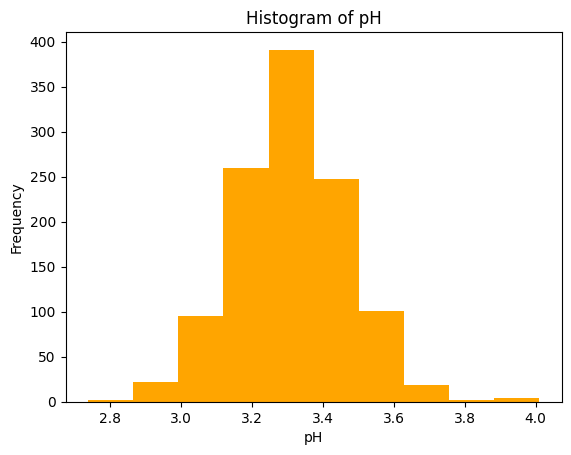

In [ ]:
plt.hist(df["pH"], color = 'orange', alpha = 1)
plt.title("Histogram of pH")
plt.xlabel("pH")
plt.ylabel("Frequency")
plt.show()

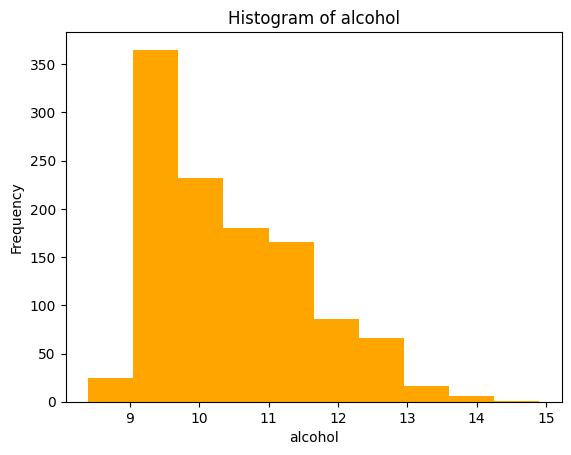

In [ ]:
plt.hist(df["alcohol"], color = 'orange', alpha = 1)
plt.title("Histogram of alcohol")
plt.xlabel("alcohol")
plt.ylabel("Frequency")
plt.show()

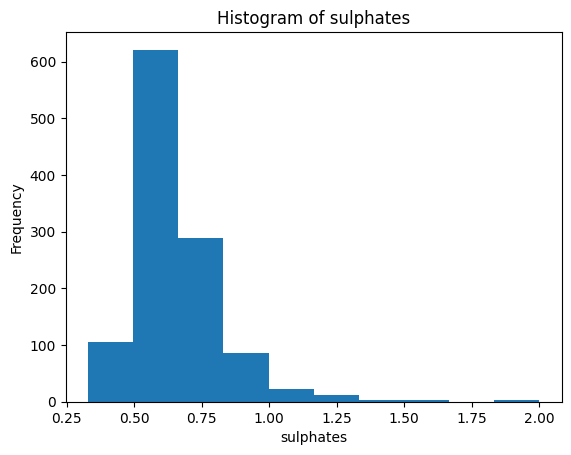

In [ ]:
plt.hist(df["sulphates"])
plt.title("Histogram of sulphates")
plt.xlabel("sulphates")
plt.ylabel("Frequency")
plt.show()

Splitting the dataset 80% for training and validation, 20% for testing.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('quality', axis = 1), df['quality'], test_size = 0.2)

KNN IMPLEMENTATION

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = 50)
knn_model.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=50)

In [ ]:
y_pred = knn_model.predict(x_test)

TESTING AND CHECKING RESULTS WITH CONFUSION MATRIX

In [ ]:
y_cm = confusion_matrix(y_test, y_pred)

In [ ]:
y_cm

array([[ 0,  9,  3,  0,  0],
       [ 0, 48, 46,  1,  0],
       [ 0, 37, 54,  2,  0],
       [ 0,  3, 20,  1,  0],
       [ 0,  2,  3,  0,  0]])

CHECKING CLASSIFICATION REPORT

In [ ]:
y_report = classification_report(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ACCURACY IS AROUND 0.45

In [ ]:
print(y_report)

              precision    recall  f1-score   support

           4       0.00      0.00      0.00        12
           5       0.48      0.51      0.49        95
           6       0.43      0.58      0.49        93
           7       0.25      0.04      0.07        24
           8       0.00      0.00      0.00         5

    accuracy                           0.45       229
   macro avg       0.23      0.23      0.21       229
weighted avg       0.40      0.45      0.41       229



RANDOM TREE ALGORITHM

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 100)
model.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
model.score(x_test, y_test)

0.5851528384279476

In [ ]:
y_predict =  model.predict(x_test)

In [ ]:
cm = confusion_matrix(y_test, y_predict)
cm

array([[ 0,  6,  6,  0,  0],
       [ 0, 69, 24,  2,  0],
       [ 0, 33, 52,  8,  0],
       [ 0,  1, 10, 13,  0],
       [ 0,  0,  3,  2,  0]])

ACCURACY SLIGHTLY IMPROVES TO 0.6

In [ ]:
print(classification_report(y_test, y_predict))


              precision    recall  f1-score   support

           4       0.00      0.00      0.00        12
           5       0.63      0.73      0.68        95
           6       0.55      0.56      0.55        93
           7       0.52      0.54      0.53        24
           8       0.00      0.00      0.00         5

    accuracy                           0.59       229
   macro avg       0.34      0.37      0.35       229
weighted avg       0.54      0.59      0.56       229



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


GRADIENT BOOSTING


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbr = GradientBoostingClassifier()

In [ ]:
gbr.fit(x_train, y_train)

GradientBoostingClassifier()

ACCURACY IS AROUND 0.54

In [ ]:
print(classification_report(y_test, gbr.predict(x_test)))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00        12
           5       0.61      0.69      0.65        95
           6       0.51      0.53      0.52        93
           7       0.45      0.42      0.43        24
           8       0.00      0.00      0.00         5

    accuracy                           0.55       229
   macro avg       0.26      0.27      0.27       229
weighted avg       0.51      0.55      0.52       229



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, gbr.predict(x_test))

0.5458515283842795

In [ ]:
from sklearn.model_selection import cross_val_score

CHECKING CROSS VALIDATION SCORE

In [ ]:
cross_val_score(gbr, x_train, y_train, cv = 3, n_jobs = -1).mean()

0.6224870578084555